In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('/content/Mc_Donalds.xlsx')

In [5]:
data

,Country,Big Mac Price,New Hourly Wage
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35
5,Chile,1.96,2.80
6,China,1.20,2.40
7,Czech Republic,1.96,2.40
8,Denmark,4.09,14.40
9,Euro area,2.98,9.59


In [6]:
data.describe()

,Big Mac Price,New Hourly Wage
count,27.000000,27.000000
mean,2.238889,6.058889
std,0.844627,4.903372
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.500000


In [7]:
# prompt: check for missing value in data

data.isnull().sum()


,0
Country,0
Big Mac Price,0
New Hourly Wage,0


In [8]:
# prompt: check for duplicates in data

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows :")
duplicate_rows


Duplicate Rows :


,Country,Big Mac Price,New Hourly Wage


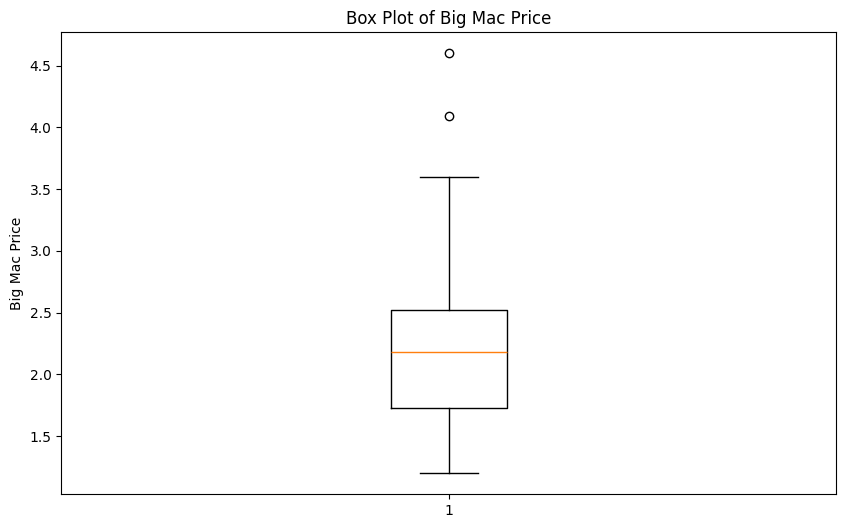

In [9]:
# prompt: generate box plot on a  column

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(data['Big Mac Price'])
plt.title('Box Plot of Big Mac Price')
plt.ylabel('Big Mac Price')
plt.show()


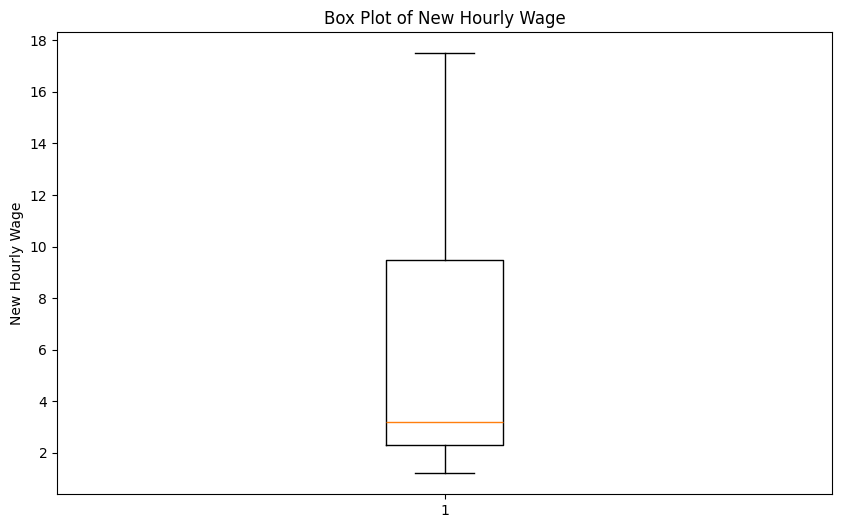

In [10]:
# prompt: generate box plot on a  column

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(data['New Hourly Wage'])
plt.title('Box Plot of New Hourly Wage')
plt.ylabel('New Hourly Wage')
plt.show()

In [11]:
# prompt: remove country column

data = data.drop('Country', axis=1)
data


,Big Mac Price,New Hourly Wage
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35
5,1.96,2.80
6,1.20,2.40
7,1.96,2.40
8,4.09,14.40
9,2.98,9.59


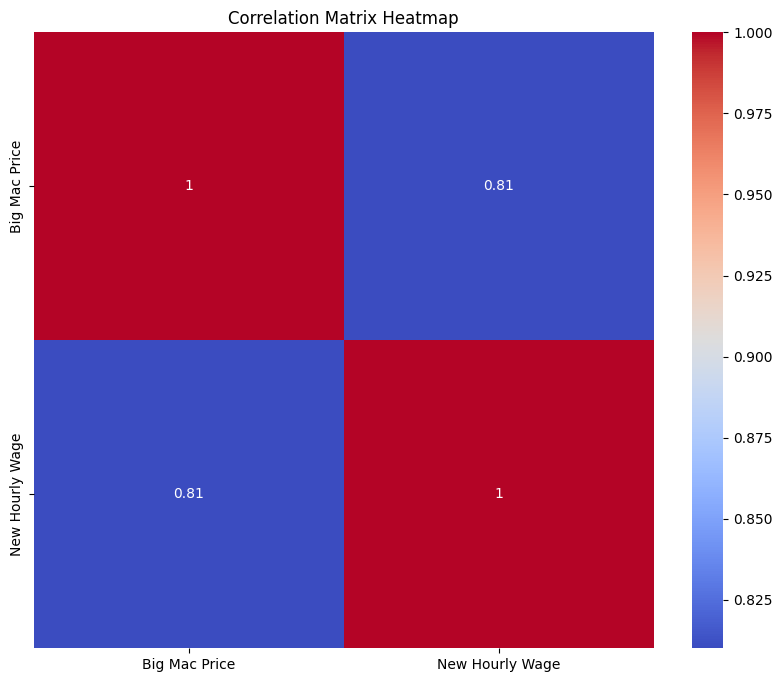

In [16]:
# prompt: generate heatmap on numeric values

import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
# prompt: set x as Big Mac price and y as New Hourly Wage

x = data['Big Mac Price']
y = data['New Hourly Wage']


In [14]:
x

,Big Mac Price
0,1.42
1,1.86
2,1.48
3,3.14
4,2.21
5,1.96
6,1.20
7,1.96
8,4.09
9,2.98


In [15]:
y

,New Hourly Wage
0,1.70
1,7.80
2,2.05
3,12.30
4,9.35
5,2.80
6,2.40
7,2.40
8,14.40
9,9.59


In [17]:
# prompt: extract simple linear regression on x and y

import statsmodels.api as sm

# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        New Hourly Wage   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     47.73
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           3.05e-07
Time:                        07:32:07   Log-Likelihood:                -66.314
No. Observations:                  27   AIC:                             136.6
Df Residuals:                      25   BIC:                             139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4704      1.625     -2.751

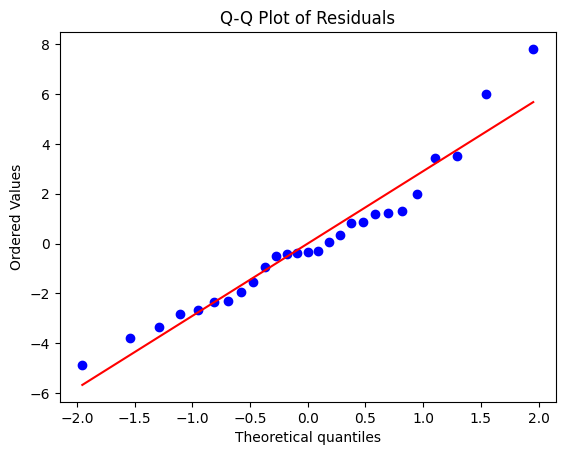

In [20]:
# prompt: check if residual are distributed normally for statsmodule

import scipy.stats as stats

# Get the residuals from the model
residuals = model.resid

# Create a Q-Q plot to visually assess normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()



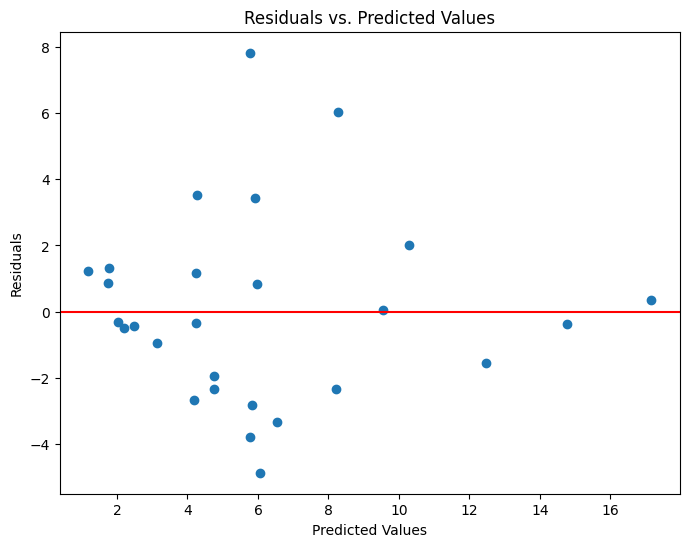

In [24]:
# prompt: generated a scatter plot for residual vs predicted value

# Create a scatter plot of residuals vs. predicted values
predicted_values = model.predict()
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()


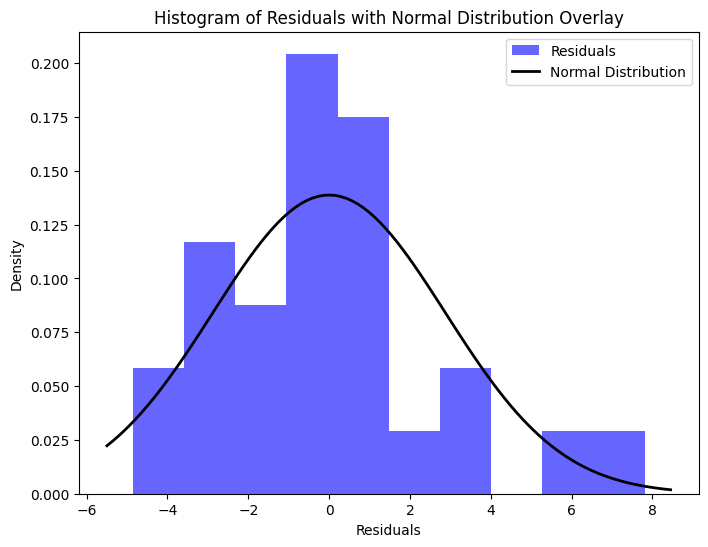

In [29]:
# prompt: check whether residuals are normally distributed and plot histogram with a line
import numpy as np
# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, density=True, alpha=0.6, color='b', label='Residuals')

# Fit a normal distribution to the residuals
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=residuals.mean(), scale=residuals.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with Normal Distribution Overlay")
plt.legend()
plt.show()
